# A primer on scikit-Learn

[scikit-learn](https://scikit-learn.org/stable/index.html) is a Python library that has a ton of easy to use machine learning functions. It was originally released in 2010 and has enjoyed active development and a lot of use since. It is open source and commercially usable, indeed various big names use it, including Spotify. Spotify tends to make better automated playlists than the other streaming services so that seems like as good a recommendation for scikit-learn as any!

Install instructions are [here](https://scikit-learn.org/stable/install.html#installation-instructions), but you can use the regular conda or pip syntax unless you have an unusual situation.

Probably best to make a conda environment for machine learning and install scikit-learn in there to avoid conflicts.

Typically you will see scikit-learn loaded as sklearn and I will use that abbreviation henceforth.

To illustrate how easy it is to do stuff with sklearn, lets do an example from Géron "Hands-On Machine Learning with Scikit-Learn & TensorFlow". I have modified the code a fair bit since some of the syntax in the book is deprecated. I also cribbed a lot of code from a sklearn [example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html). We will do the classic letter classification using MNIST.

# MNIST fun
First, load data. sklearn has a bunch of common datasets, including various small toy sets, like this one, and some large datasets that emulate real world problems. See [the package docs](https://scikit-learn.org/stable/datasets.html) for more.

The images are 8x8 pixels of digits written somewhat crappily. 

<Figure size 432x288 with 0 Axes>

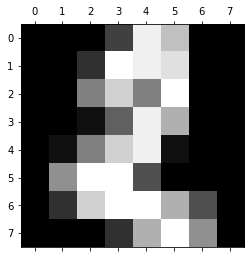

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

#check out the poorly drawn digit

plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

We need to reshape the data so it works with our particular learner. len is length, so the first line tells us how many images we have. The images.reshape command is used to change the 8x8 image into a vector of shape (64,). Note the null value after the comma. I have found several machine learning tools need that format for input, e.g., (64,1) would not work, though that is what we might think the dimensions should be. 

In [2]:
# flatten the images
n_samples = len(digits.images)

print(digits.images.shape)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 8, 8)
(1797, 64)


In [3]:
# Split data into 70% train and 30% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False, random_state = 666)

print(x_train.shape)
print(x_test.shape)

(1257, 64)
(540, 64)


Next, we need to do a train/test split. sklearn comes with some very handy tools for this. This is a simple example, where we do not attempt to stratify the split in any way. "test_size" refers to the proportion of the split going to testing data. "shuffle" is if the data should be shuffled before splitting, as would be needed if the data had been ordered in some way (as they probably will have been for many biology datasets). "random_state" is the seed for the shuffling.

Next, we define a classifier. This just specifies the model, nothing is learned yet. We will use a support vector classifier, because that is what sklearn's example used. For large datasets this will be slow and some other classifier will probably work better. Like the SGDClassifier, which Géron uses. Heck, lets do that one too!

In [4]:
# Create a support vector classifier
clf = svm.SVC()

In [5]:
#train
clf.fit(x_train, y_train)
#predict
predicted = clf.predict(x_test)

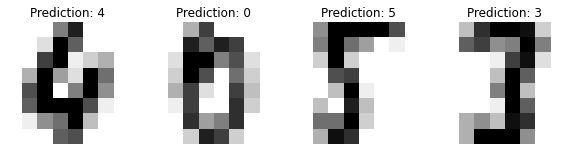

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Here is some handy code to see how the classifier did. 

In [7]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.96      0.98      0.97        53
           2       1.00      0.96      0.98        53
           3       0.96      0.83      0.89        53
           4       0.98      0.95      0.96        57
           5       0.92      0.98      0.95        56
           6       0.98      0.98      0.98        54
           7       0.96      0.98      0.97        54
           8       0.88      0.96      0.92        52
           9       0.93      0.93      0.93        55

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540




Precision is the proportion of all positives that were correct. So it is a measure of how often the model is correct. Recall is  the ratio of true positives to true positives plus false negatives. So it can be thought of as how likely it is to identify a given digit either positively or negatively. See the [wiki](https://en.wikipedia.org/wiki/Precision_and_recall) page for more if this seems odd. 

F1 is the harmonic mean of precision and recall. Support is the number of times a particular class shows up in the data set (e.g., there are 53 number threes in this set).

Let's repeat all this with the SGD classifier.

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.76      0.83      0.79        53
           2       1.00      1.00      1.00        53
           3       0.95      0.75      0.84        53
           4       0.98      0.89      0.94        57
           5       0.93      0.96      0.95        56
           6       0.95      0.98      0.96        54
           7       1.00      0.89      0.94        54
           8       0.71      0.90      0.80        52
           9       0.91      0.87      0.89        55

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540




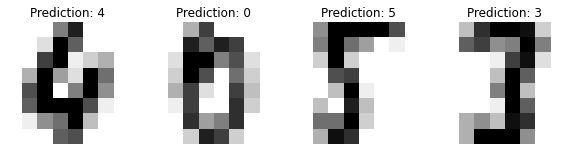

In [8]:
sgd = SGDClassifier(random_state = 666)
#train
sgd.fit(x_train, y_train)

#predict
predicted = sgd.predict(x_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

If we want to, we can plot a confusion matrix.

Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  3  0  1  5  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  1  0  0  0  0  0  0 50  1]
 [ 0  0  0  1  0  2  0  1  0 51]]


/Users/joshuaharrison/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


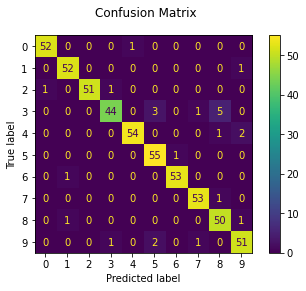

In [9]:
disp = metrics.plot_confusion_matrix(clf, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

This is telling us truth versus predicted for each class. The diagonal line shows the number of times the model did well and the off-diagonal values show how the model failed.

# Sklearn seems cool, what else?

From the docs: "scikit-learn has on the order of 100 to 200 models (more generally called "estimators"), split into three categories: <br>
Supervised Learning (linear regression, support vector machines, random forest, neural nets, ...)<br>
Unsupervised Learning (clustering, PCA, mixture models, manifold learning, ...)<br>
Dataset Transformation (preprocessing, text feature extraction, one-hot encoding, ...)<br>

Each model that I have messed with has a huge number of parameters to play with and, as we have seen, plotting useful output can be pretty simple with matplotlib. Also, sklearn can do some of its own plots too. But, what really seems to be sweet about sklearn, is how you can make Pipeline class objects that codify various preprocessing (feature engineering) steps and then "exposes" these methods to the estimator. In effect, it is a way to make a function that does a bunch of preprocessing steps easily and then feeds the engineered data product into a model. This is great because then you can try different parameters for the estimator or for preprocessing and then do model comparison. From the docs...

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
#Call the pipeline
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.88

This may not seem that great, but say you want to do all this stuff to your data:

1. impute data
2. combine or modify certain features
3. scale and center (calculate z scores) features. 
4. One hot encode a bunch of stuff. 
5. combine numeric and one-hot encoded categorical features into one giant matrix

You could put all this stuff in a pipeline that feeds straight into an estimator (model). Pretty handy. I copied some code demonstrating this from [HERE](https://towardsdatascience.com/10-things-you-didnt-know-about-scikit-learn-cccc94c50e4f).

Note that the machine learning APIs mlr3 (R) and tidymodels (R) also have this functionality.

In [11]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load auto93 data set which contains both categorical and numeric features
X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

# Create lists of numeric and categorical features  
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regressor to the preprocessor
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Fit the complete pipeline
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.766


Make a html flowchart, bc why not. Code from the last referenced link.  

In [12]:
from sklearn import set_config

set_config(display='diagram')   

lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['City_MPG', 'Highway_MPG', 'Number_of_cylinders', 'Engine_size',
       'Horsepower', 'RPM', 'Engine_revolutions_per_mile',
       'Fuel_tank_capacity', 'Passenger_capacity', 'Length', 'Wheelbase',
       'Width', 'U-turn_space', 'Rear_seat_room', 'Luggage_capacity',
       'Weight'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LinearRegression())])